# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: Ifeoluwa Oduwaiye
<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [2]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

## Table Of Contents

1. Introduction and Importation of libraries
2. Exploratory Data Analysis
3. Feature Engineering
4. Model Building
5. Feature Selection
6. Model Evaluation

## Introduction and Importation of libraries

In [41]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score, f1_score, accuracy_score, classification_report

In [4]:
# Open the dataset

df = pd.read_csv("/content/salary.csv")

In [5]:
# View first 5 rows

df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Final_weight    32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Country         32560 non-null  object
 14  Salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Dataset has no missing values


## Exploratory Data Analysis

Text(0.5, 1.0, 'Salary Distribution by Count')

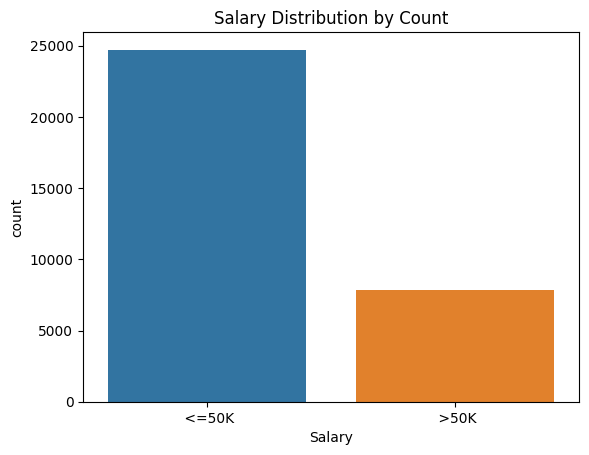

In [9]:
sns.countplot(x='Salary', data=df)
plt.title("Salary Distribution by Count")

<Axes: xlabel='Age', ylabel='Hours_per_week'>

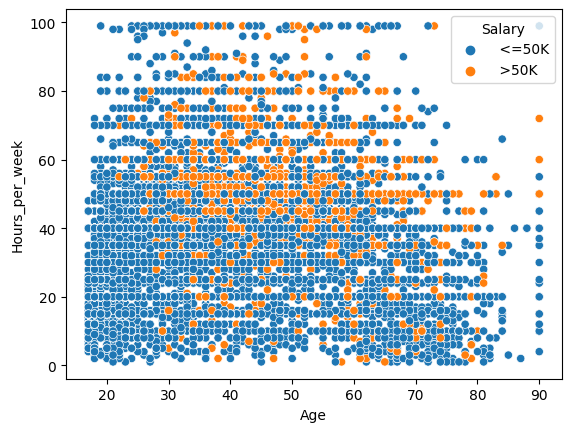

In [11]:
sns.scatterplot(x='Age', y='Hours_per_week', hue ='Salary', data=df)

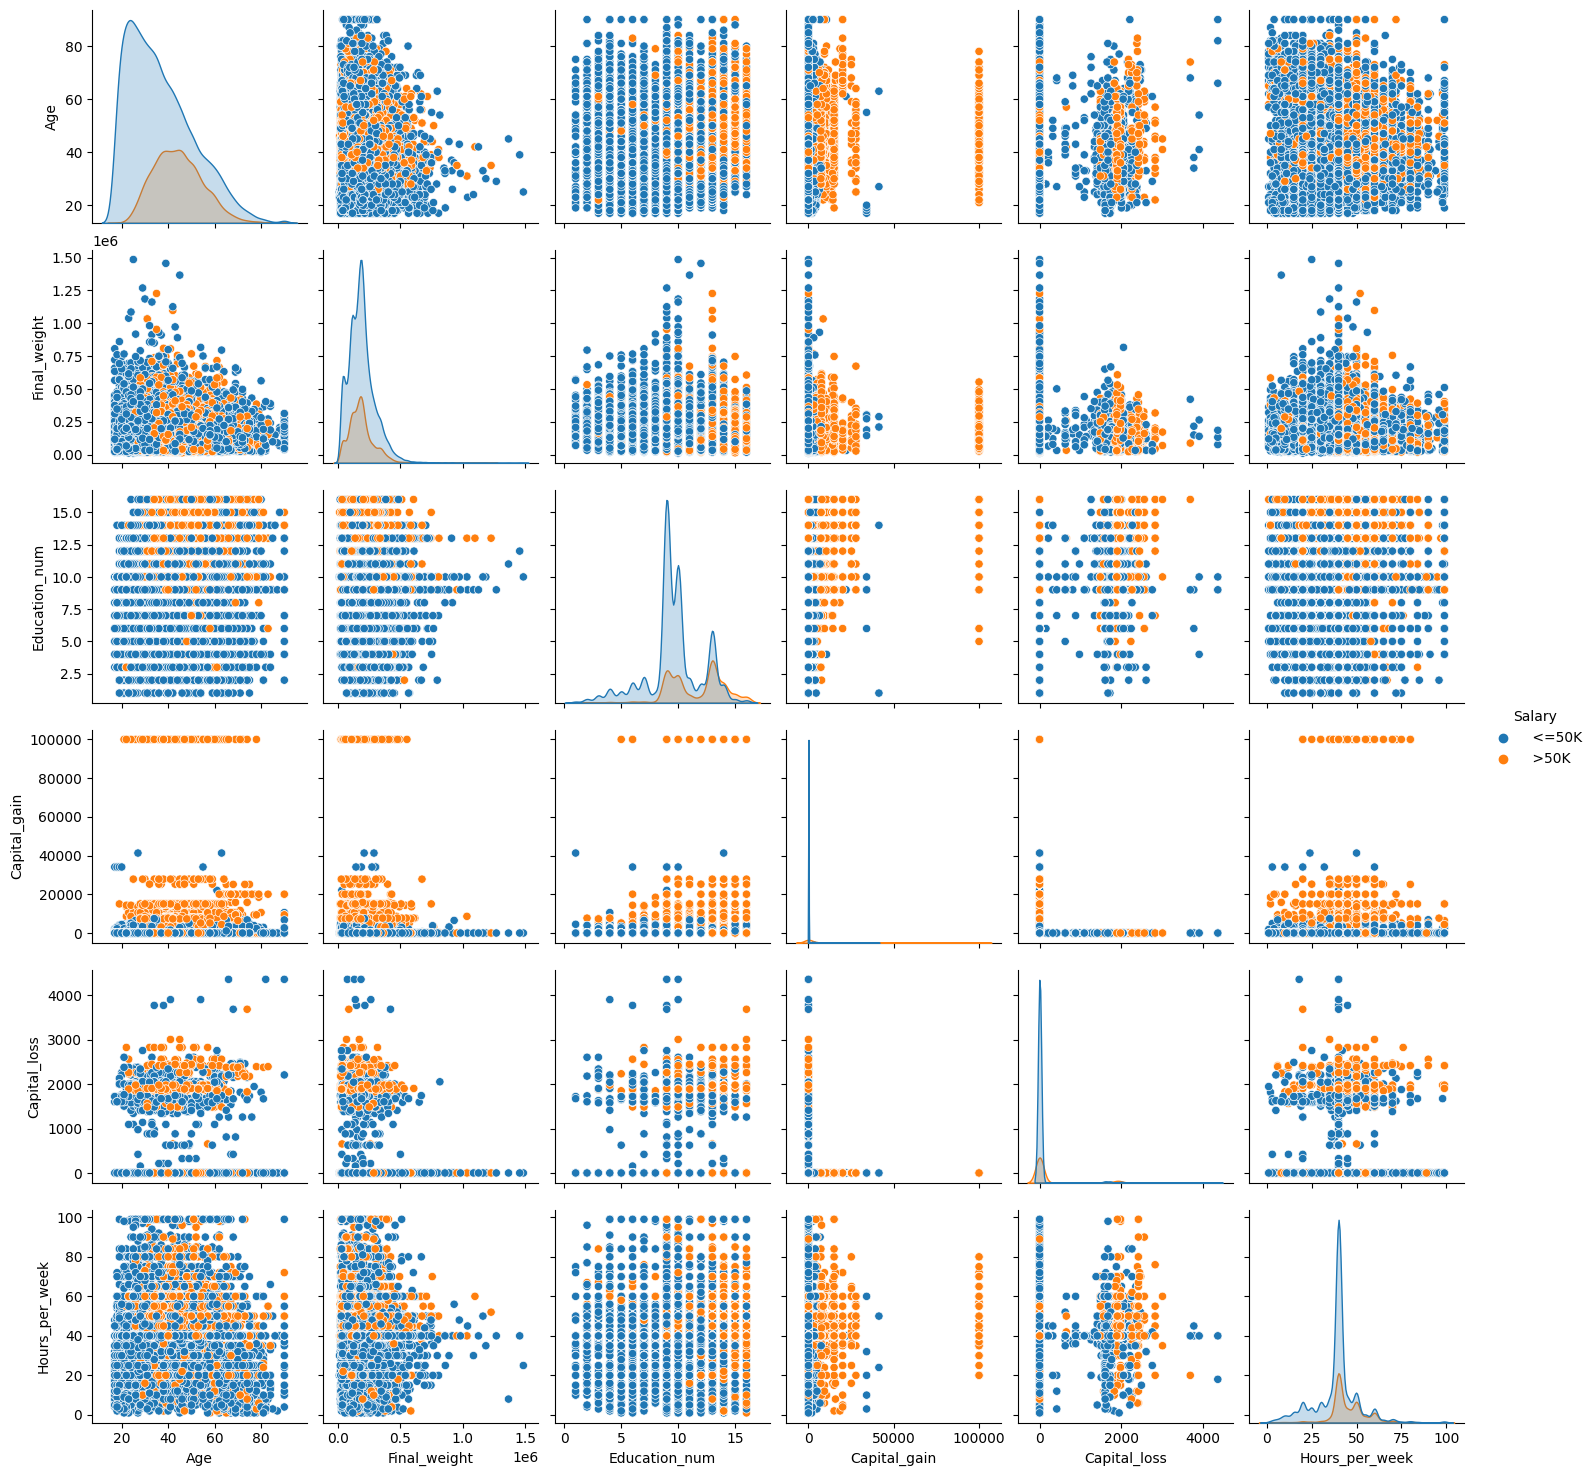

In [15]:
sns.pairplot(df, hue="Salary")

Text(0.5, 1.0, 'Distribution of Salary across Gender')

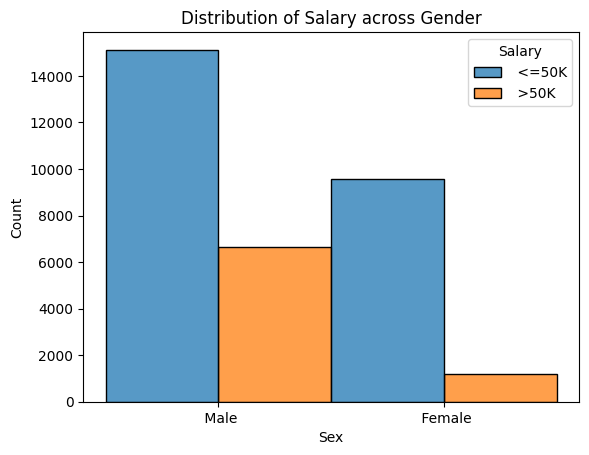

In [20]:
sns.histplot(binwidth=3, x='Sex', hue="Salary", data=df, stat="count", multiple="dodge")
plt.title("Distribution of Salary across Gender")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

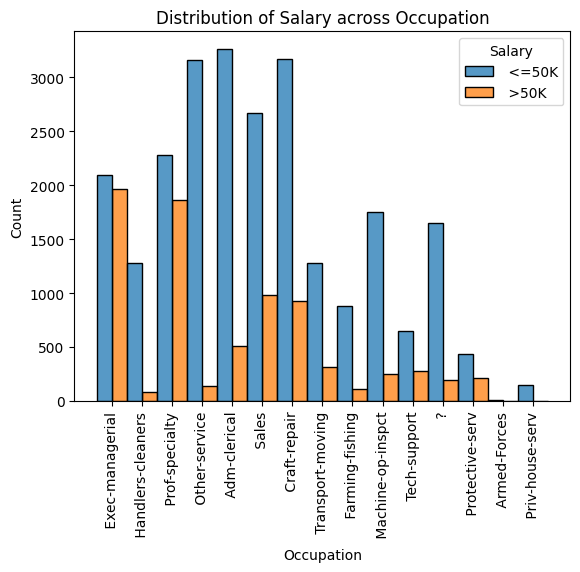

In [26]:
sns.histplot(binwidth=3, x='Occupation', hue="Salary", data=df, stat="count", multiple="dodge")
plt.title("Distribution of Salary across Occupation")
plt.xticks(rotation=90)

## Feature Engineering

In [31]:
# Standardize the numeric columns

int_cols = df.select_dtypes(include=np.number).columns

for col in int_cols:
  scaler = StandardScaler()
  df[col] = scaler.fit_transform(df[[col]])

In [33]:
# Encode the categorical columns
 
obj_cols = df.select_dtypes(exclude=np.number).columns

for col in obj_cols:
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col])

In [34]:
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,0.837097,6,-1.008742,9,1.134779,2,4,0,4,1,-0.145914,-0.216663,-2.22212,39,0
1,-0.042640,4,0.245046,11,-0.420027,0,6,1,4,1,-0.145914,-0.216663,-0.03543,39,0
2,1.057031,4,0.425770,1,-1.197429,2,6,0,2,1,-0.145914,-0.216663,-0.03543,39,0
3,-0.775755,4,1.408146,9,1.134779,2,10,5,2,0,-0.145914,-0.216663,-0.03543,5,0
4,-0.115952,4,0.898170,12,1.523480,2,4,5,4,0,-0.145914,-0.216663,-0.03543,39,0


## Model Building


In [35]:
X = df.drop(['Salary'], axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, shuffle=True)

In [37]:
# Fit the data on the 3 models

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [42]:
# Determine the best performing model using accuracy score

# 1
pred1 = model1.predict(X_test)
print("LR: {}".format(accuracy_score(y_test, pred1)))

# 2
pred2 = model2.predict(X_test)
print("DTC: {}".format(accuracy_score(y_test, pred2)))

# 3
pred3 = model3.predict(X_test)
print("SVC: {}".format(accuracy_score(y_test, pred3)))

LR: 0.8213759213759214
DTC: 0.8078624078624078
SVC: 0.8002457002457003


### A good Accuracy Score is 1. 
### Since the Accuracy Score of the Logistic Regression model is closer to 1, I will choose Logistic Regression as my preferred model.

## Feature Selection

In [70]:
# Get the feature importance for each column

coef = model1.coef_[0]
imp_features = pd.Series(X_train.columns)[list(np.abs(coef)>0.1)]

In [71]:
# Select the important variables

X_train_op = X_train[imp_features]
X_test_op = X_test[imp_features]

In [72]:
model = LogisticRegression()

model.fit(X_train_op, y_train)

pred = model.predict(X_test_op)

## Model Evaluation

In [73]:
# Jaccard Score

print("Jaccard Score: {}".format(jaccard_score(y_test, pred)))

Jaccard Score: 0.385429902583651


In [74]:
# F1 Score

print("F1 Score: {}".format(f1_score(y_test, pred)))

F1 Score: 0.5564047691837359


In [75]:
# Accuracy Score

print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy Score: 0.8217444717444717


In [78]:
# Classification report

print("Classification Report: ")
print(classification_report(y_test, pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6111
           1       0.73      0.45      0.56      2029

    accuracy                           0.82      8140
   macro avg       0.79      0.70      0.72      8140
weighted avg       0.81      0.82      0.81      8140

